<a href="https://colab.research.google.com/github/amsac/ML_Notebooks/blob/main/iisc/M2_AST_04_Object_Detection_YOLO_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Assignment: Object Detection

## Learning Objectives

At the end of the experiment you will be able to :

* understand what is object detection
* configure a state-of-the-art algorithm called YOLO V3
* make inferences from YOLO on real-time images

## Introduction:


### What is YOLO V3?
YOLOv3 (You Only Look Once, Version 3) is a real-time object detection algorithm that identifies specific objects in videos, live feeds or images. The YOLO machine learning algorithm uses features learned by a deep convolutional neural network to detect an object. YOLO has the advantage of being much faster than other networks and still maintains accuracy.

The approach involves a single deep convolutional neural network (originally a version of GoogLeNet, later updated and called **DarkNet** based on VGG) that splits the input into a grid of cells and each cell directly predicts a bounding box and object classification. The result is a large number of candidate bounding boxes that are consolidated into a final prediction by a post-processing step.

It allows the model to look at the whole image at test time, so its predictions are informed by the global context in the image. Using CNN, YOLO can predict all objects in one forward pass and that is the reason for its full name “You Only Look Once”. You Only Look Once means it looks for the image/frame only once and is able to detect all the objects in the image/frame.

High-scoring regions are noted as positive detections of whatever class they most closely identify with. For example, in a live feed of traffic, YOLO can be used to detect different kinds of vehicles depending on which regions of the video score highly in comparison to predefined classes of vehicles.



### How YOLOv3 works?

The YOLOv3 network divides an input image into an S x S grid of cells and predicts bounding boxes as well as class probabilities for each grid. Each grid cell is responsible for predicting B-bounding boxes and C-class probabilities of objects whose centers fall inside the grid cell. Bounding boxes are the regions of interest (ROI) of the candidate objects. The “B” is associated with the number of using anchors. Each bounding box has (5 + C) attributes. The value of “5” is related to 5 bounding box attributes, which are center coordinates (bx, by) and shape (bh, bw) of the bounding box, and one confidence score. The “C” is the number of classes. The confidence score reflects how confident a box contains an object. The confidence score is in the range of 0 – 1.

Since we have an S x S grid of cells, after running a single forward pass convolutional neural network to the whole image, YOLOv3 produces a 3-D tensor with the shape of [S, S, B * (5 + C].

The following figure illustrates the basic principle of YOLOv3 where the input image is divided into the 13 x 13 grid of cells (13 x 13 grid of cells is used for the first scale, whereas YOLOv3 actually uses 3 different scales and we're going to discuss it in the section prediction across scale).

<center>
<img style="-webkit-user-select: none;margin: auto;" src="https://machinelearningspace.com/wp-content/uploads/2020/01/bbox_ok-2-868x1024.png" width="800" height="800">
</center>

YOLOv3 was trained on the COCO dataset with C=80(class) and B=3(). So, for the first prediction scale, after a single forward pass of CNN, the YOLOv3 outputs a tensor with the shape of [(13, 13, 3 * (5 + 80)].

### Setup Steps:

In [4]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2400572" #@param {type:"string"}

In [5]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9605144576" #@param {type:"string"}

In [6]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M2_AST_04_Object_Detection_YOLO_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")

    # ipython.magic("wget https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/Acoustic_Extinguisher_Fire_Dataset.xlsx")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aimlops-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [7]:
import os  # Provides functions to interact with the operating system, such as file and directory manipulation
import numpy as np  # A library for numerical computations, particularly for handling arrays and matrices
from keras.layers import Conv2D, Input, BatchNormalization, LeakyReLU, ZeroPadding2D, UpSampling2D
# Imports common neural network layers from Keras:
# - Conv2D: 2D convolution layer, useful for feature extraction
# - Input: Specifies the input tensor for the model
# - BatchNormalization: Normalizes inputs to stabilize and accelerate training
# - LeakyReLU: Activation function allowing a small gradient for negative inputs
# - ZeroPadding2D: Adds padding of zeros to the input image
# - UpSampling2D: Upsamples the input to a higher resolution

from keras.layers import add, concatenate
# - add: Adds two tensors element-wise
# - concatenate: Joins two tensors along a specific axis

from keras.models import Model
# Allows building models by specifying the input and output layers

import struct  # Handles binary data and performs conversions between Python objects and C structs
import cv2  # OpenCV library for image processing and computer vision tasks
import keras  # High-level API for building and training neural networks, running on top of TensorFlow

### Pre-trained Weights from the repository

Model Weights can be downloaded from the website of the original creator of YOLOv3. The model has already been trained by the authors and thus it is easier to use the pre-trained weights for inference. Download the model weights and place them into your current directory with the filename `“yolov3.weights.”`. These were trained using the DarkNet code base on the MSCOCO dataset.

**Note:** Refer to the following [link](https://pjreddie.com/darknet/yolo/)

In [8]:
#@title Download the pre-trained weight
!wget -qq https://pjreddie.com/media/files/yolov3.weights

### Create a class WeightReader to load the pre-trained weights for yolov3

WeightReader class will parse the file and load the model weights into memory to set it in our Keras model.

We will be reading the original weights of Yolo. The original network was not trained in Keras and thus we define a special class to read weights.

In [9]:
# Class to load pretrained weights into a model
class WeightReader:
    def __init__(self, weight_file):
        # Open the weight file in binary mode for reading
        with open(weight_file, 'rb') as w_f:
            # Read and unpack the file header (major, minor, and revision numbers)
            major,    = struct.unpack('i', w_f.read(4))  # Read 4 bytes as an integer (major version)
            minor,    = struct.unpack('i', w_f.read(4))  # Read 4 bytes as an integer (minor version)
            revision, = struct.unpack('i', w_f.read(4))  # Read 4 bytes as an integer (revision number)

            # Skip extra header bytes depending on the version
            if (major * 10 + minor) >= 2 and major < 1000 and minor < 1000:
                w_f.read(8)  # Skip 8 bytes for newer formats
            else:
                w_f.read(4)  # Skip 4 bytes for older formats

            # Determine whether weights are transposed based on the version
            transpose = (major > 1000) or (minor > 1000)

            # Read the rest of the file as binary data
            binary = w_f.read()

        # Initialize offset for reading weights and store all weights in a NumPy array
        self.offset = 0
        self.all_weights = np.frombuffer(binary, dtype='float32')  # Convert binary data to a float32 array

    def read_bytes(self, size):
        # Reads 'size' number of weights from the current offset
        self.offset = self.offset + size  # Update the offset
        return self.all_weights[self.offset-size:self.offset]  # Return the weights read

    # Load weights into the provided Keras model
    def load_weights(self, model):
        # Loop through 106 layers, assuming a specific architecture
        for i in range(106):
            try:
                # Get the convolutional layer by name
                conv_layer = model.get_layer('conv_' + str(i))
                print("loading weights of convolution #" + str(i))

                # Skip layers 81, 93, and 105 for normalization
                if i not in [81, 93, 105]:
                    # Get the batch normalization layer associated with the convolutional layer
                    norm_layer = model.get_layer('bnorm_' + str(i))

                    # Get the size of weights for the normalization layer
                    size = np.prod(norm_layer.get_weights()[0].shape)

                    # Read normalization parameters: beta, gamma, mean, and variance
                    beta  = self.read_bytes(size)  # Offset (bias)
                    gamma = self.read_bytes(size)  # Scale
                    mean  = self.read_bytes(size)  # Mean
                    var   = self.read_bytes(size)  # Variance

                    # Set the weights for the normalization layer
                    norm_layer.set_weights([gamma, beta, mean, var])

                # Check if the convolutional layer has biases
                if len(conv_layer.get_weights()) > 1:
                    # Read the bias and kernel weights
                    bias   = self.read_bytes(np.prod(conv_layer.get_weights()[1].shape))
                    kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))

                    # Reshape and transpose the kernel weights to match the layer's expected shape
                    kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
                    kernel = kernel.transpose([2, 3, 1, 0])  # Transpose to Keras format

                    # Set the weights for the convolutional layer
                    conv_layer.set_weights([kernel, bias])
                else:
                    # For layers without biases, only set the kernel weights
                    kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
                    kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
                    kernel = kernel.transpose([2, 3, 1, 0])
                    conv_layer.set_weights([kernel])
            except ValueError:
                # If the layer is not found in the model, print a message
                print("no convolution #" + str(i))

    def reset(self):
        # Resets the offset to the beginning for re-reading weights
        self.offset = 0


### YOLO V3 Architecture

YOLO v3 is using a Darknet-53  network to perform feature extraction which is undeniably larger compare to YOLO v2. This network is composed of 53 convolutional layers with shortcut connections (Redmon & Farhadi, 2018).

The code implementation is composed of several components as given below:

<center>
<img style="-webkit-user-select: none;margin: auto;" src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*-Whes2CytS_v22Wx1LZ6RA.png" width="500
" height="700">
</center>

The 53 layers of the darknet are further stacked with 53 more layers for the detection head, making YOLO v3 a total of a 106-layer fully convolutional underlying architecture. This leading to a large architecture, though making it a bit slower as compared to YOLO v2, but enhancing the accuracy at the same time.


The diagram given below explains the complete architecture of YOLO v3 (Combining both, the extractor and the detector). [ [Reference](https://towardsdatascience.com/yolo-v3-object-detection-53fb7d3bfe6b) ]



<center>
<img style="-webkit-user-select: none;margin: auto;" src="https://miro.medium.com/v2/resize:fit:2000/format:webp/1*d4Eg17IVJ0L41e7CTWLLSg.png" width="1600
" height="600">
</center>

### Create the Yolo v3 model

We first create a function for creating the Convolutional blocks and then define the blocks required for the YOLO model.

* _conv_block function which is used to construct a convolutional layer
* make_yolov3_model function which is used to create layers of convolutional and stack together as a whole.

In [10]:
# Defines a convolutional block with optional skip connections
def _conv_block(inp, convs, skip=True):
    """
    Parameters:
    - inp: Input tensor to the block.
    - convs: A list of dictionaries, where each dictionary contains configuration
             for a convolutional layer (e.g., filter size, kernel size, stride, etc.).
    - skip: Boolean indicating whether to add a skip connection (residual connection).

    Returns:
    - Output tensor after applying the convolutional block.
    """
    x = inp  # Initialize the output tensor with the input tensor
    count = 0  # Counter to track the current convolution layer index in the loop

    for conv in convs:
        # Save the current tensor as a skip connection before the second-to-last convolution, if skip is enabled
        if count == (len(convs) - 2) and skip:
            skip_connection = x  # Save tensor for the residual connection
        count += 1  # Increment the counter

        # Apply zero padding for convolutions with stride > 1
        if conv['stride'] > 1:
            x = ZeroPadding2D(((1, 0), (1, 0)))(x)  # Peculiar padding, as Darknet prefers padding on the left and top

        # Apply a convolutional layer
        x = Conv2D(conv['filter'],  # Number of filters (output channels)
                   conv['kernel'],  # Kernel size
                   strides=conv['stride'],  # Stride of the convolution
                   padding='valid' if conv['stride'] > 1 else 'same',  # Valid padding for strided conv, otherwise same
                   name='conv_' + str(conv['layer_idx']),  # Unique name for the layer
                   use_bias=False if conv['bnorm'] else True)(x)  # Use bias only if batch normalization is not applied

        # Apply batch normalization if specified
        if conv['bnorm']:
            x = BatchNormalization(epsilon=0.001, name='bnorm_' + str(conv['layer_idx']))(x)

        # Apply Leaky ReLU activation if specified
        if conv['leaky']:
            x = LeakyReLU(alpha=0.1, name='leaky_' + str(conv['layer_idx']))(x)

    # Add skip connection (residual connection) if specified
    return add([skip_connection, x]) if skip else x


Next, we create a Darknet with 108 convolutional layers.

In [11]:
def make_yolov3_model():
    # Define the input layer with dynamic shape for width and height and 3 channels (RGB image).
    input_image = Input(shape=(None, None, 3))

    # Layer 0 => 4: Initial convolutional blocks for feature extraction.
    # This creates two convolutional layers with increasing filters (32, 64) and strides, followed by two layers for refinement.
    x = _conv_block(input_image, [{'filter': 32, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 0},
                                  {'filter': 64, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 1},
                                  {'filter': 32, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 2},
                                  {'filter': 64, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 3}])

    # Layer 5 => 8: Transition to higher-level features by increasing filter size to 128.
    x = _conv_block(x, [{'filter': 128, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 5},
                        {'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 6},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 7}])

    # Layer 9 => 11: Refinement of 128-filter block features.
    x = _conv_block(x, [{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 9},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 10}])

    # Layer 12 => 15: Transition to 256 filters for capturing more complex features.
    x = _conv_block(x, [{'filter': 256, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 12},
                        {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 13},
                        {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 14}])

    # Layer 16 => 36: Residual blocks with 256 filters, repeated 7 times for feature enhancement.
    for i in range(7):
        x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 16+i*3},
                            {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 17+i*3}])

    # Save the output for later skip connection.
    skip_36 = x

    # Layer 37 => 40: Transition to 512 filters for higher-level features.
    x = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 37},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 38},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 39}])

    # Layer 41 => 61: Residual blocks with 512 filters, repeated 7 times.
    for i in range(7):
        x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 41+i*3},
                            {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 42+i*3}])

    # Save the output for later skip connection.
    skip_61 = x

    # Layer 62 => 65: Transition to 1024 filters for the highest-level features.
    x = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 62},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 63},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 64}])

    # Layer 66 => 74: Refinement of the 1024-filter block, repeated 3 times.
    for i in range(3):
        x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 66+i*3},
                            {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 67+i*3}])

    # Layer 75 => 79: Final refinement before the first YOLO output.
    x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 75},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 76},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 77},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 78},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 79}], skip=False)

    # Layer 80 => 82: YOLO output 1 (large objects).
    yolo_82 = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 80},
                              {'filter':  255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 81}], skip=False)

    # Layer 83 => 86: Upsampling and skip connection with `skip_61` for medium objects.
    x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 84}], skip=False)
    x = UpSampling2D(2)(x)
    x = concatenate([x, skip_61])

    # Layer 87 => 91: Refinement of medium-level features.
    x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 87},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 88},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 89},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 90},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 91}], skip=False)

    # Layer 92 => 94
    # This block processes the feature map for medium-sized object detection.
    # Layer 92 applies a 3x3 convolution with 512 filters, batch normalization, and a leaky ReLU activation to refine features.
    # Layer 93 applies a 1x1 convolution with 255 filters (corresponding to 3 anchor boxes × (5 bounding box attributes + number of classes)).
    # No batch normalization or activation is applied in Layer 93 since it prepares the final prediction output for this scale.
    yolo_94 = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 92},
                              {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 93}], skip=False)

    # Layer 95 => 98
    # This section upsamples the feature map and combines it with earlier feature maps for detecting smaller objects.
    # Layer 95 reduces the depth of the feature map using a 1x1 convolution with 128 filters while retaining key information.
    x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True,   'layer_idx': 96}], skip=False)

    # The UpSampling2D layer scales the feature map by a factor of 2, effectively doubling its spatial resolution.
    x = UpSampling2D(2)(x)

    # The feature map is concatenated with the feature map from layer 36 (skip_36) to combine higher-resolution details for small object detection.
    x = concatenate([x, skip_36])

    # Layer 99 => 106
    # This block generates the final detection feature map for small objects.
    # Alternating 1x1 and 3x3 convolutions refine the feature map, focusing on small-scale object features.
    # - Layers 99, 101, and 103 apply 1x1 convolutions with 128 filters to reduce dimensionality while retaining key features.
    # - Layers 100, 102, and 104 apply 3x3 convolutions with 256 filters to extract spatial patterns.
    # Layer 105 performs a 1x1 convolution with 255 filters, similar to Layer 93, to prepare the output for detection.
    # This prepares predictions for the third detection scale, focusing on small objects.
    yolo_106 = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 99},
                              {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 100},
                              {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 101},
                              {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 102},
                              {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 103},
                              {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 104},
                              {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 105}], skip=False)

    # Model definition
    # Combines three outputs for multi-scale object detection:
    # - yolo_82 for large objects.
    # - yolo_94 for medium objects.
    # - yolo_106 for small objects.
    # Returns a Keras model capable of detecting objects at three different scales.
    model = Model(input_image, [yolo_82, yolo_94, yolo_106])
    return model

### Define the YOLO v3 model & setting the weights

Load the pre-trained weights which we downloaded earlier. Save the model using Keras save function and specifying the filename.

In [12]:
# define the yolo v3 model
yolov3 = make_yolov3_model()

# load the weights
weight_reader = WeightReader('yolov3.weights')

# set the weights
weight_reader.load_weights(yolov3)

# save the model to file
# yolov3.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [13]:
yolov3.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_0 (Conv2D)           │ (None, None, None, 32) │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bnorm_0                   │ (None, None, None, 32) │            128 │ conv_0[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_0 (LeakyReLU)       │ (None, None, None, 32) │              0 │ bnorm_0[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, None, None, 32) │              0 │ leaky_0[0][0]          │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_1 (Conv2D)           │ (None, None, None, 64) │         18,432 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bnorm_1                   │ (None, None, None, 64) │            256 │ conv_1[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_1 (LeakyReLU)       │ (None, None, None, 64) │              0 │ bnorm_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_2 (Conv2D)           │ (None, None, None, 32) │          2,048 │ leaky_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bnorm_2                   │ (None, None, None, 32) │            128 │ conv_2[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_2 (LeakyReLU)       │ (None, None, None, 32) │              0 │ bnorm_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_3 (Conv2D)           │ (None, None, None, 64) │         18,432 │ leaky_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bnorm_3                   │ (None, None, None, 64) │            256 │ conv_3[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_3 (LeakyReLU)       │ (None, None, None, 64) │              0 │ bnorm_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, None, None, 64) │              0 │ leaky_1[0][0],         │
│                           │                        │                │ leaky_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, None, None, 64) │              0 │ add[0][0]              │
│ (ZeroPadding2D)           │                        │                │                        │
├──────────────────────

 Total params: 62,001,757 (236.52 MB)

 Trainable params: 61,949,149 (236.32 MB)

 Non-trainable params: 52,608 (205.50 KB)

Download a sample image from the Web, or upload your image to pass through the model to get a prediction.

In [14]:
#@title Download sample images
!wget -qq "https://thumbs.dreamstime.com/b/golden-retriever-dog-21668976.jpg" -O dog.jpg
!wget -qq "https://cdn.extras.talentsprint.com/DLFA/Experiment_related_data/bus.jpg"

In [15]:
image_path = "/content/bus.jpg"
#image_path = "/content/dog.jpg"

### Preprocessing the Input Image

We need to preprocess the image before passing through the network to ensure the shape of the image changes uniformly throughout the network.

In [16]:
def preprocess_input(image, net_h, net_w):
    """
    Preprocess an input image for a neural network:
    - Resize the image while maintaining the aspect ratio.
    - Embed the resized image into a fixed-sized "letterbox" frame.

    Parameters:
    - image: Input image as a NumPy array (height x width x 3).
    - net_h, net_w: Target height and width for the network input.

    Returns:
    - new_image: Preprocessed image as a NumPy array (1 x net_h x net_w x 3).
    """
    # Get the dimensions of the input image
    new_h, new_w, _ = image.shape

    # Determine the new size of the image while maintaining the aspect ratio
    if (float(net_w) / new_w) < (float(net_h) / new_h):  # Check if width scaling is the limiting factor
        new_h = (new_h * net_w) / new_w  # Scale the height proportionally to fit the width
        new_w = net_w  # Set the new width to the network width
    else:  # Height scaling is the limiting factor
        new_w = (new_w * net_h) / new_h  # Scale the width proportionally to fit the height
        new_h = net_h  # Set the new height to the network height

    # Resize the image to the computed new size
    # - Convert BGR to RGB using `[:,:,::-1]`
    # - Normalize pixel values to the range [0, 1] by dividing by 255
    resized = cv2.resize(image[:, :, ::-1] / 255., (int(new_w), int(new_h)))

    # Create a "letterbox" image filled with a gray background (0.5 in normalized range)
    new_image = np.ones((net_h, net_w, 3)) * 0.5

    # Embed the resized image into the center of the letterbox
    # - Calculate top-left corner for centering
    new_image[int((net_h - new_h) // 2):int((net_h + new_h) // 2),
              int((net_w - new_w) // 2):int((net_w + new_w) // 2), :] = resized

    # Add a batch dimension to the image (required for neural network input)
    new_image = np.expand_dims(new_image, 0)

    return new_image


Reading the image from the path and applying the pre-processing function:

In [17]:
# Set the target input size for Yolov3 model
# Yolov3 expects an input image of size 416x416, so we set the target height and width.
net_h, net_w = 416, 416

# Read the input image from the given file path
image = cv2.imread(image_path)  # 'image_path' is the file location of the image

# Get the dimensions (height, width, channels) of the input image
image_h, image_w, _ = image.shape  # 'image.shape' returns a tuple (height, width, channels)

# Preprocess the image to match the expected input size for Yolov3 (416x416)
# This function might resize the image, normalize pixel values, or apply other transformations.
new_image = preprocess_input(image, net_h, net_w)

# Output the shape of the pre-processed image
# The shape of 'new_image' should now be (416, 416, channels) as per the Yolov3 input requirements.
new_image.shape

(1, 416, 416, 3)

## Getting prediction output from the Yolo network

In [18]:
# Make a prediction using the Yolov3 model
# The 'predict' method generates predictions based on the pre-processed image input (new_image).
y_pred = yolov3.predict(new_image)  # 'new_image' is the pre-processed image tensor ready for prediction

# Summarize the shape of each element in the prediction output
# Yolov3 typically returns a list of arrays, one for each detection layer, each containing the predicted bounding boxes, class probabilities, and confidence scores.
print([a.shape for a in y_pred])  # Print the shape of each element in 'y_pred' to understand the output structure

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]


## Decoding the output into boxes

The output of the YOLO v3 prediction is in the form of a list of arrays that are hard to be interpreted. As YOLO v3 is a multi-scale detection, it is decoded into three different scales in the shape of (13, 13, 225), (26, 26, 225), and (52, 52, 225).

We need to create a few helping classes & functions to get output as a bounding box and prediction.

### Create a class for the Bounding Box

BoundBox defines the corners of each bounding box in the context of the input image shape and class probabilities.

In [19]:
class BoundBox:
    # Initialize the BoundBox object with the coordinates of the bounding box
    # and optional objectness and class probabilities
    def __init__(self, xmin, ymin, xmax, ymax, objness=None, classes=None):
        self.xmin = xmin  # Minimum x-coordinate (left side) of the bounding box
        self.ymin = ymin  # Minimum y-coordinate (top side) of the bounding box
        self.xmax = xmax  # Maximum x-coordinate (right side) of the bounding box
        self.ymax = ymax  # Maximum y-coordinate (bottom side) of the bounding box

        self.objness = objness  # Confidence score that indicates the presence of an object in the box (optional)
        self.classes = classes  # Probability distribution over different classes (optional)

        self.label = -1  # Initialize label to -1; it will store the class with the highest probability
        self.score = -1  # Initialize score to -1; it will store the highest probability score for the label

    # Method to get the label of the object inside the bounding box
    def get_label(self):
        # If label is not yet assigned (still -1), compute the class with the highest probability
        if self.label == -1:
            self.label = np.argmax(self.classes)  # Label is the class with the highest probability
        return self.label  # Return the assigned label

    # Method to get the score (probability) associated with the label
    def get_score(self):
        # If score is not yet assigned (still -1), compute the score based on the label
        if self.score == -1:
            self.score = self.classes[self.get_label()]  # The score is the probability for the most likely class
        return self.score  # Return the score associated with the label


### Intersection over Union(IoU) calculation

The following functions help in calculating IoU:

* Sigmoid function
* _interval_overlap : Checks if two intervals overlap. Two intervals do not overlap when one ends before the other begins.
* bbox_iou : Calculates intersection over union(IoU) of two boxes.

[Reference: IoU](https://learnopencv.com/intersection-over-union-iou-in-object-detection-and-segmentation/)

In [20]:
def _sigmoid(x):
    # Apply the sigmoid function element-wise to the input x.
    # The sigmoid function maps any input value to a value between 0 and 1.
    # It is commonly used for activation functions in neural networks and for probabilities.
    return 1. / (1. + np.exp(-x))  # Return the sigmoid of x using the formula: 1 / (1 + exp(-x))

In [21]:
# Helper function to calculate the overlap between two intervals
def _interval_overlap(interval_a, interval_b):
    # Extract the start and end points for each interval
    x1, x2 = interval_a  # Interval A: [x1, x2]
    x3, x4 = interval_b  # Interval B: [x3, x4]

    # Check if the intervals do not overlap
    if x3 < x1:
        # If interval B ends before interval A starts, there's no overlap
        if x4 < x1:
            return 0
        else:
            # Otherwise, there's partial overlap: the overlap is from x1 to the minimum of x2 and x4
            return min(x2, x4) - x1
    else:
        # Case when interval B starts after interval A ends, check for overlap
        if x2 < x3:
            # No overlap if interval A ends before interval B starts
            return 0
        else:
            # Otherwise, there's partial overlap: the overlap is from x3 to the minimum of x2 and x4
            return min(x2, x4) - x3

# Intersection over Union (IoU) function to measure the overlap between two bounding boxes
# IOU = Area of Intersection / Area of Union
def bbox_iou(box1, box2):
    # Calculate the width of the intersection between box1 and box2 along the x-axis
    intersect_w = _interval_overlap([box1.xmin, box1.xmax], [box2.xmin, box2.xmax])

    # Calculate the height of the intersection between box1 and box2 along the y-axis
    intersect_h = _interval_overlap([box1.ymin, box1.ymax], [box2.ymin, box2.ymax])

    # Area of intersection = width * height of the overlapping region
    intersect = intersect_w * intersect_h

    # Calculate the area of each box
    w1, h1 = box1.xmax - box1.xmin, box1.ymax - box1.ymin  # Area of box1
    w2, h2 = box2.xmax - box2.xmin, box2.ymax - box2.ymin  # Area of box2

    # Area of union = area of box1 + area of box2 - area of intersection
    union = w1 * h1 + w2 * h2 - intersect

    # Return the Intersection over Union (IoU) which is the ratio of the intersection area to the union area
    return float(intersect) / union


### Non-Max Suppression

It takes boxes that have the presence of objects in them along with non-max threshold as a parameter.

The model has predicted a lot of candidate bounding boxes, and most of the boxes will be referring to the same objects. The list of bounding boxes can be filtered and those boxes that overlap and refer to the same object can be merged. We can define the amount of overlap as a configuration parameter, in this case, 50% or 0.5. This filtering of bounding box regions is generally referred to as non-maximal suppression and is a required post-processing step.

Rather than purging the overlapping boxes, their predicted probability for their overlapping class is cleared. This allows the boxes to remain and be used if they also detect another object type.


In [22]:
def do_nms(boxes, nms_thresh):
    # Check if the list of boxes is not empty
    if len(boxes) > 0:
        nb_class = len(boxes[0].classes)  # Get the number of classes based on the first box's class count
    else:
        return  # If no boxes are present, return early

    # Iterate over each class to perform Non-Maximum Suppression (NMS)
    for c in range(nb_class):
        # Sort the boxes by their class confidence scores (in descending order)
        sorted_indices = np.argsort([-box.classes[c] for box in boxes])

        # Iterate through the sorted list of boxes
        for i in range(len(sorted_indices)):
            index_i = sorted_indices[i]  # Get the index of the i-th box

            # Skip the box if its confidence score for class 'c' is 0 (no object detected)
            if boxes[index_i].classes[c] == 0: continue

            # Compare the current box with all remaining boxes
            for j in range(i+1, len(sorted_indices)):
                index_j = sorted_indices[j]  # Get the index of the j-th box

                # If the IoU (Intersection over Union) of box i and box j is greater than the threshold, suppress the j-th box
                if bbox_iou(boxes[index_i], boxes[index_j]) >= nms_thresh:
                    boxes[index_j].classes[c] = 0  # Set the confidence score for class 'c' of box j to 0 (suppress the box)

This will leave us with the same number of boxes, but only very few of interest. We can retrieve just those boxes that strongly predict the presence of an object: that is are more than 60% confident. This can be achieved by enumerating all boxes and checking the class prediction values. We can then look up the corresponding class label for the box and add it to the list. Each box must be considered for each class label, just in case the same box strongly predicts more than one object.

### Decode the output of the network:

We will iterate through each of the NumPy arrays, one at a time, and decode the candidate bounding boxes and class predictions based on the object threshold.

The first 4 elements will be the coordinates of the Bounding box, and 5th element will be the object score followed by the class probabilities.

In [23]:
def decode_netout(netout, anchors, obj_thresh, nms_thresh, net_h, net_w):
    # Extract the grid height and width from the shape of the network output
    grid_h, grid_w = netout.shape[:2]

    nb_box = 3  # Number of bounding boxes per grid cell (common in YOLO)

    # Reshape the output to separate bounding box attributes (x, y, w, h, objectness, and class probabilities)
    netout = netout.reshape((grid_h, grid_w, nb_box, -1))

    # The number of classes is the total number of output elements minus 5 (4 for bounding box + 1 for objectness)
    nb_class = netout.shape[-1] - 5

    # Initialize an empty list to store bounding boxes
    boxes = []

    # Apply sigmoid function to the first two elements (x, y) and the last elements (objectness, class probabilities)
    netout[..., :2]  = _sigmoid(netout[..., :2])  # Sigmoid for x and y (center coordinates)
    netout[..., 4:]  = _sigmoid(netout[..., 4:])  # Sigmoid for objectness and class probabilities

    # Calculate the confidence scores for the classes (objectness * class probabilities)
    netout[..., 5:]  = netout[..., 4][..., np.newaxis] * netout[..., 5:]

    # Set the class probabilities to zero if they are below the objectness threshold
    netout[..., 5:] *= netout[..., 5:] > obj_thresh

    # Iterate through all grid cells to decode bounding boxes
    for i in range(grid_h * grid_w):
        row = i // grid_w  # Calculate the row index of the current grid cell
        col = i % grid_w   # Calculate the column index of the current grid cell

        # Iterate through all bounding boxes in the current grid cell
        for b in range(nb_box):
            # Get the objectness score (the 5th element in the output for each box)
            objectness = netout[int(row)][int(col)][b][4]

            # Skip the box if its objectness score is less than the threshold
            if objectness.all() <= obj_thresh:
                continue

            # Decode the bounding box coordinates (x, y, w, h)
            x, y, w, h = netout[int(row)][int(col)][b][:4]

            # Convert the center coordinates (x, y) to the corresponding image dimensions
            x = (col + x) / grid_w  # x is normalized to the image width
            y = (row + y) / grid_h  # y is normalized to the image height

            # Convert width and height to actual image dimensions using anchors
            w = anchors[2 * b + 0] * np.exp(w) / net_w  # width is adjusted using the corresponding anchor
            h = anchors[2 * b + 1] * np.exp(h) / net_h  # height is adjusted using the corresponding anchor

            # Extract the class probabilities for the bounding box
            classes = netout[int(row)][col][b][5:]

            # Create a BoundBox object for the detected bounding box and append it to the list
            box = BoundBox(x - w / 2, y - h / 2, x + w / 2, y + h / 2, objectness, classes)
            boxes.append(box)

    return boxes

### Correcting the Yolo boxes.

We have the bounding boxes but they need to be stretched back into the shape of the original image. This will allow plotting the original image and drawing the bounding boxes, detecting real objects.



In [24]:
# Function to adjust the bounding box sizes according to the original image size
def correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w):
    # Calculate the scaling factor to preserve the aspect ratio when resizing the image
    if (float(net_w) / image_w) < (float(net_h) / image_h):
        # If the network width-to-height ratio is smaller than the image's width-to-height ratio
        new_w = net_w
        new_h = (image_h * net_w) / image_w  # Scale the height proportionally to width
    else:
        # If the network height-to-width ratio is smaller than the image's height-to-width ratio
        new_h = net_w
        new_w = (image_w * net_h) / image_h  # Scale the width proportionally to height

    # Correct the bounding boxes to the original image dimensions
    for i in range(len(boxes)):
        # Calculate the offset and scale for the x and y axes based on the resizing
        x_offset, x_scale = (net_w - new_w) / 2. / net_w, float(new_w) / net_w
        y_offset, y_scale = (net_h - new_h) / 2. / net_h, float(new_h) / net_h

        # Adjust the bounding box coordinates based on the scaling factors and offset
        # The coordinates are scaled back to the original image size (image_w, image_h)
        boxes[i].xmin = int((boxes[i].xmin - x_offset) / x_scale * image_w)
        boxes[i].xmax = int((boxes[i].xmax - x_offset) / x_scale * image_w)
        boxes[i].ymin = int((boxes[i].ymin - y_offset) / y_scale * image_h)
        boxes[i].ymax = int((boxes[i].ymax - y_offset) / y_scale * image_h)

### Drawing a white box around the object present in the image
      
The below function is implemented by taking the filename of the original. photograph and the parallel lists of bounding boxes, labels, and scores, and create a plot showing all detected objects.

In [25]:
# Function to draw bounding boxes on the image and display the class labels
def draw_boxes(image, boxes, labels, obj_thresh):
    for box in boxes:
        label_str = ''  # Initialize the label string for each box
        label = -1      # Initialize label index as -1 to signify no label initially

        # Iterate over all class labels and check if the class score exceeds the threshold
        for i in range(len(labels)):
            if box.classes[i] > obj_thresh:
                label_str += labels[i]  # Append the class label to the label string
                label = i                # Update the label index to the current class
                print(labels[i] + ': ' + str(box.classes[i] * 100) + '%')  # Print class and its confidence

        # If a valid label was found (score > threshold), draw a rectangle and label on the image
        if label >= 0:
            # Draw a rectangle around the detected object
            cv2.rectangle(image, (box.xmin, box.ymin), (box.xmax, box.ymax), (0, 255, 0), 3)

            # Add the label text above the bounding box with the detection score
            cv2.putText(image,
                        label_str + ' ' + str(box.get_score()),  # Display label and score
                        (box.xmin, box.ymin - 13),              # Position the text above the box
                        cv2.FONT_HERSHEY_SIMPLEX,               # Use a simple font
                        1e-3 * image.shape[0],                   # Scale the font size
                        (0, 255, 0),                            # Green color for the text
                        2)                                      # Text thickness

    return image

## Getting bounding box and prediction

Now, we are going to use all the above functions to get the final output as object detection from the **y_pred**, that we got from the YOLO_v3 model initially by passing an image.

#### Setting some parameters:

In [26]:
# Input image size for Yolov3 is 416 x 416 which we set using net_h and net_w.
net_h, net_w = 416, 416

# Object threshold is set to 0.5 and Non-max suppression threshold is set to 0.45
obj_thresh, nms_thresh = 0.5, 0.45

# We set the anchor boxes
# Anchor Boxes used to predict bounding boxes, YOLOv3 uses predefined bounding boxes
# called as anchors/priors and also these anchors/priors are used to calculate real width and real height for predicted bounding boxes.
anchors = [[116,90,  156,198,  373,326],  [30,61, 62,45,  59,119], [10,13,  16,30,  33,23]]

# Then define the 80 labels for the Common Objects in Context (COCO) model to predict
# The following 80 classes are available using COCO’s pretrained weights:
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", \
          "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", \
          "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", \
          "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", \
          "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", \
          "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", \
          "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", \
          "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse", \
          "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", \
          "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]


### We have already created a model and passed the image, now predicting the bounding box:

In [27]:
# summarize the shape of the list of arrays that we got from model as y_pred
print([a.shape for a in y_pred])

[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]


In [28]:
boxes = []

for i in range(len(y_pred)): # Iteration over the prediction list
    # decode the output of the network
    boxes += decode_netout(y_pred[i][0], anchors[i], obj_thresh, nms_thresh, net_h, net_w)

# correct the sizes of the bounding boxes
correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w)

# suppress non-maximal boxes
do_nms(boxes, nms_thresh)

# draw bounding boxes on the image using labels
draw_boxes(image, boxes, labels, obj_thresh)

# write the image with bounding boxes to file
cv2.imwrite(image_path[:-4] + '_detected' + image_path[-4:], (image).astype('uint8'))

bus: 99.66723918914795%
person: 87.05922365188599%


True

### Plotting the Final Result
We plot the final output from the network. Please change the name of the detected image in order to plot your own result!

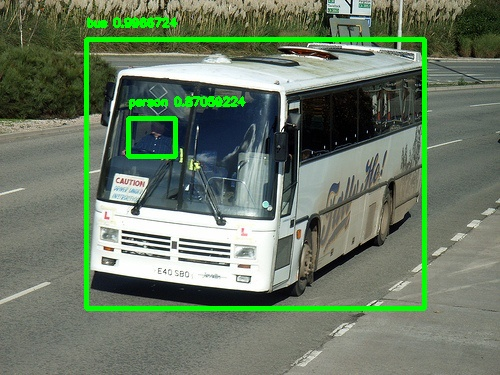

In [37]:
from google.colab.patches import cv2_imshow

x = cv2.imread("bus_detected.jpg")
#x = cv2.imread("dog_detected.jpg")

cv2_imshow(x)

#### References

1. [YOLOv3 Object Detection with Keras](https://drive.google.com/file/d/1ERd0CiKkB-KyhIoETQc1zS_AQzDkvd16/view?usp=sharing)

2. [The beginner’s guide to implementing YOLOv3]( https://machinelearningspace.com/yolov3-tensorflow-2-part-1/#nms-unique)

### Please answer the questions below to complete the experiment:




In [38]:
#@title  Let us say, in a YOLO implementation, one image is divided into a 32x32 grid of cells and 3 bounding boxes. There are 10 classes of objects. What is the shape of the output tensor from YOLOv3?{run: "auto", form-width: "500px", display-mode: "form" }
Answer = "(32,32,45)" #@param ["", "(32,32,15)", "(32,32,30)", "(32,32,45)", "(15,32,45)"]

In [39]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [40]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "na" #@param {type:"string"}


In [41]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [42]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [43]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [36]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please answer Question
